In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12,6)

In [25]:
np.linspace(0, 20, 15)

array([ 0.        ,  1.42857143,  2.85714286,  4.28571429,  5.71428571,
        7.14285714,  8.57142857, 10.        , 11.42857143, 12.85714286,
       14.28571429, 15.71428571, 17.14285714, 18.57142857, 20.        ])

In [26]:
5 * x + np.random.normal(0.0, 20.0, 15)

array([-11.24575058, -13.11376526,  20.57066094,   3.26808992,
         0.32535454,  65.02726109,  38.34161685,  51.35056409,
        28.64789342,  53.3980598 ,  73.64702322,  55.55155702,
        93.22824608,  80.84436906,  94.166125  ])

In [27]:
x.reshape(15, 1)

array([[ 0.        ],
       [ 1.42857143],
       [ 2.85714286],
       [ 4.28571429],
       [ 5.71428571],
       [ 7.14285714],
       [ 8.57142857],
       [10.        ],
       [11.42857143],
       [12.85714286],
       [14.28571429],
       [15.71428571],
       [17.14285714],
       [18.57142857],
       [20.        ]])

In [28]:
np.random.seed(42)

# Creates 15 x values from 0 to 20
x = np.linspace(0, 20, 15)

# Data generating process for y; The true relationship between x and y
# There is a linear relationship between the x and y
y = 5 * x + np.random.normal(0.0, 20.0, 15)

# Get X in the right shape in order to be used in an sklearn model
X = x.reshape(15, 1)

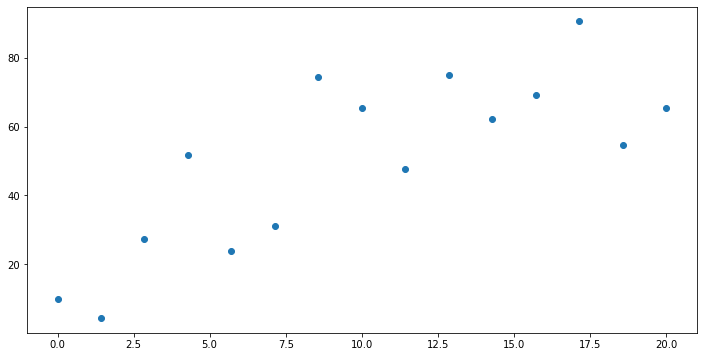

In [29]:
# Plot the data
plt.scatter(X, y)

In [30]:
# What is our X and what is our y, and how could we fit a model?
from sklearn.linear_model import LinearRegression

In [38]:
m = LinearRegression()
m.fit(X, y)

LinearRegression()

In [34]:
# Make predictions for X
ypred = m.predict(X)

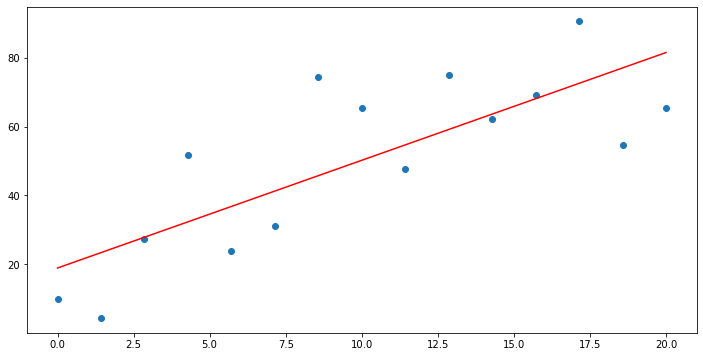

In [35]:
# Plot the data
plt.scatter(X, y)
plt.plot(X, ypred, color='r')

In [36]:
# The true value for w is 5 (We know that because we defined the relationship between X and y)
m.coef_ # The estimated value of w is 3.13

array([3.13158623])

# Build a model that overfits

In [39]:
import pandas as pd

In [40]:
# Create a DataFrame
df = pd.DataFrame({
    'x': x,
    'y': y
})

df.head()

,x,y
0,0.000000,9.934283
1,1.428571,4.377571
2,2.857143,27.239485
3,4.285714,51.889169
4,5.714286,23.888361


In [41]:
df['x^2'] = df['x']**2
df.head()

,x,y,x^2
0,0.000000,9.934283,0.000000
1,1.428571,4.377571,2.040816
2,2.857143,27.239485,8.163265
3,4.285714,51.889169,18.367347
4,5.714286,23.888361,32.653061


In [ ]:
m.fit(df[['x', 'x^2']], df['y'])
# m.fit(X, y)
# m.fit(explanatory_variables, dependent_variable)


If we fit the model m.fit(df[['x', 'x^2']], df['y']), then we estimate the relationship

$$
y = b + w_1 * x + w_2 * x^2 + \epsilon
$$

If we on the other hand fit the model m.fit(df[['x^2']], df['y']), then we estimate the relationship

$$
y = b + w_2 * x^2 + \epsilon
$$

In [51]:
ypred_2 = m.predict(df[['x', 'x^2']])

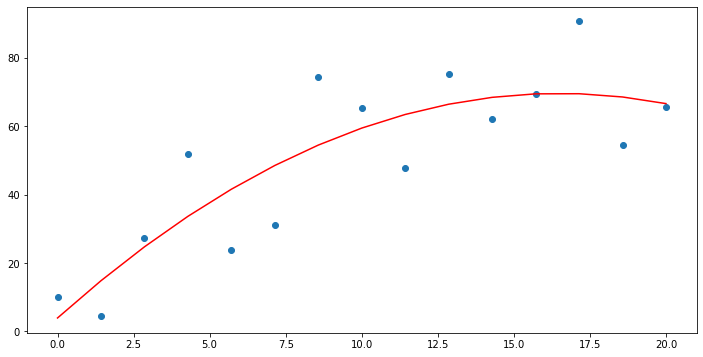

In [52]:
plt.scatter(x, y)
plt.plot(x, ypred_2, color='r')

In [53]:
# Add PolynomialFeatures von scikit-learn
from sklearn.preprocessing import PolynomialFeatures

In [60]:
polynomial_transformer = PolynomialFeatures(degree=9, include_bias=False)
polynomial_features = pd.DataFrame(polynomial_transformer.fit_transform(X), 
                                  columns=polynomial_transformer.get_feature_names())
polynomial_features

,x0,x0^2,x0^3,x0^4,x0^5,x0^6,x0^7,x0^8,x0^9
0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,1.428571,2.040816,2.915452,4.164931,5.949902e+00,8.499860e+00,1.214266e+01,1.734665e+01,2.478093e+01
2,2.857143,8.163265,23.323615,66.638900,1.903969e+02,5.439910e+02,1.554260e+03,4.440743e+03,1.268784e+04
3,4.285714,18.367347,78.717201,337.359434,1.445826e+03,6.196398e+03,2.655599e+04,1.138114e+05,4.877631e+05
4,5.714286,32.653061,186.588921,1066.222407,6.092699e+03,3.481543e+04,1.989453e+05,1.136830e+06,6.496173e+06
5,7.142857,51.020408,364.431487,2603.082049,1.859344e+04,1.328103e+05,9.486451e+05,6.776036e+06,4.840026e+07
6,8.571429,73.469388,629.737609,5397.750937,4.626644e+04,3.965695e+05,3.399167e+06,2.913572e+07,2.497347e+08
7,10.000000,100.000000,1000.000000,10000.000000,1.000000e+05,1.000000e+06,1.000000e+07,1.000000e+08,1.000000e+09
8,11.428571,130.612245,1492.711370,17059.558517,1.949664e+05,2.228187e+06,2.546500e+07,2.910285e+08,3.326040e+09
9,12.857143,165.306122,2125.364431,27326.114119,3.513358e+05,4.517174e+06,5.807795e+07,7.467165e+08,9.600641e+09


In [62]:
# Fit a model
m_poly = LinearRegression()
m_poly.fit(polynomial_features, y)

LinearRegression()

In [63]:
# Make predictions
ypred_poly = m_poly.predict(polynomial_features)

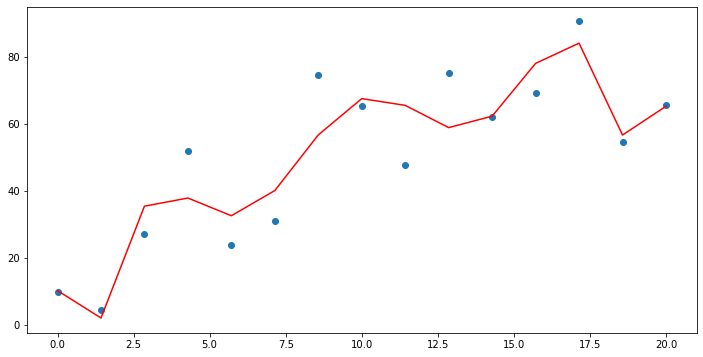

In [65]:
# Plot the predictions and the observed data
plt.scatter(x, y)
plt.plot(x, ypred_poly, color='r')

What do we observe?

In [17]:
# Play around with the number of degrees

# How can we solve the problem?

One solution to the problem is Regularization!

In [72]:
# Import the packages
from sklearn.linear_model import Ridge, Lasso, ElasticNet

## Scaling

In [67]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [68]:
# x_polynomial Werte skalieren
scaler = StandardScaler()

StandardScaler subtracts the mean from the value x and divides by the standard deviation.
Thereby the resulting feature will have a mean of zero and a standard deviation of 1.

$\frac{x - \overline{x}}{\sigma}$

In [71]:
scaled_features = pd.DataFrame(scaler.fit_transform(polynomial_features), columns=polynomial_features.columns)
scaled_features

,x0,x0^2,x0^3,x0^4,x0^5,x0^6,x0^7,x0^8,x0^9
0,-1.620185e+00,-1.078884,-0.858728,-0.734150,-0.652025,-0.592970,-0.548064,-0.512565,-0.483695
1,-1.388730e+00,-1.062940,-0.857559,-0.734064,-0.652019,-0.592970,-0.548064,-0.512565,-0.483695
2,-1.157275e+00,-1.015108,-0.849381,-0.732770,-0.651822,-0.592940,-0.548059,-0.512564,-0.483695
3,-9.258201e-01,-0.935387,-0.827183,-0.727164,-0.650482,-0.592631,-0.547989,-0.512548,-0.483691
4,-6.943651e-01,-0.823778,-0.783954,-0.712071,-0.645521,-0.591062,-0.547506,-0.512402,-0.483648
5,-4.629100e-01,-0.680282,-0.712686,-0.680247,-0.632176,-0.585691,-0.545405,-0.511597,-0.483344
6,-2.314550e-01,-0.504896,-0.606367,-0.622377,-0.602635,-0.571235,-0.538537,-0.508404,-0.481883
7,-2.878027e-16,-0.297623,-0.457988,-0.527078,-0.545273,-0.538161,-0.520036,-0.498284,-0.476440
8,2.314550e-01,-0.058462,-0.260539,-0.380894,-0.443895,-0.470845,-0.476692,-0.471003,-0.459565
9,4.629100e-01,0.212588,-0.007010,-0.168302,-0.276969,-0.345387,-0.385287,-0.405926,-0.414045


## Try different models

In [87]:
# Choose an alpha parameter
alpha = 2.0

In [109]:
# Lineare Regression
m_lin = LinearRegression()
m_lin.fit(scaled_features, y)

# Ridge Regression
m_ridge = Ridge(alpha=alpha)
m_ridge.fit(scaled_features, y)

# Lasso Regression
m_lasso = Lasso(alpha=alpha)
m_lasso.fit(scaled_features, y)

# ElasticNet Regression
m_elastic = ElasticNet(alpha=alpha, l1_ratio=1)
m_elastic.fit(scaled_features, y)

ElasticNet(alpha=2.0, l1_ratio=1)

In [110]:
# Make predictions
ypred_lin = m_lin.predict(scaled_features)
ypred_ridge = m_ridge.predict(scaled_features)
ypred_lasso = m_lasso.predict(scaled_features)
ypred_elastic = m_elastic.predict(scaled_features)

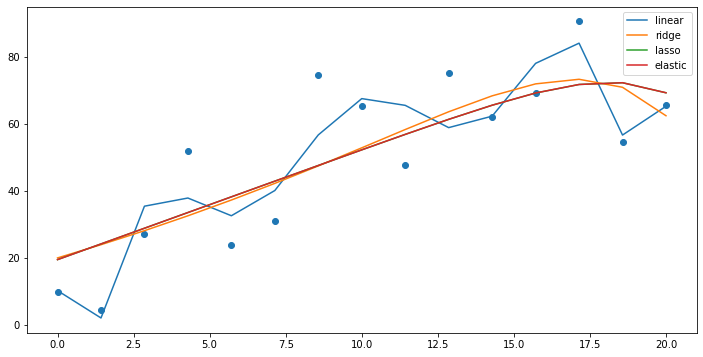

In [111]:
# Plot the result
plt.scatter(x, y)
plt.plot(x, ypred_lin, label='linear')
plt.plot(x, ypred_ridge, label='ridge')
plt.plot(x, ypred_lasso, label='lasso')
plt.plot(x, ypred_elastic, label='elastic')
plt.legend()
plt.show()

#### How do we find an adequate alpha?

In [91]:
from sklearn.linear_model import Ridge, RidgeCV

In [92]:
m_ridge_cv = RidgeCV(alphas=(0.1, 1.0, 2.0, 10.0))

In [93]:
m_ridge_cv.fit(scaled_features, y)

RidgeCV(alphas=array([ 0.1,  1. ,  2. , 10. ]))

In [97]:
m_ridge_cv.alpha_

2.0

# Ridge and Lasso are behaving differently

In [98]:
m_ridge.coef_

array([16.54747764,  7.08334924,  2.35140353, -0.11027551, -1.42556572,
       -2.12492206, -2.47476347, -2.61374538, -2.61644801])

In [99]:
m_lasso.coef_

array([20.2466749 ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -4.25120484])

Lasso will drive down a lot of the coefficients to 0. Lasso can be used as a method of automatic feature reduction.

If you have domain knowledge and you are sure that all variables actually explain something, then you should rather use Ridge.

If you domain knowledge and you are sure that a lot of variables are negligible, then you might rather want to use Lasso.

If you are unsure, you might want to use Elastic Net.